# Electron energy deposition


In the course of their passage through the atmosphere photoelectrons and auroral
electrons lose energy by a variety of inelastic collisions (Rees Book chapter 3)

## Ionization rate

The energy deposition (eV cm$^{-3}$s$^{-1}$) for monoenergetic electrons at
energy, $E_P$, can be expressed by

<br>
\begin{align}
 E(z,E_P) = q(z) \Delta E_{ion}= {\cal F} E_P\Lambda(s/R)\frac{\rho(z)}{R(E_P)}\\
 \end{align}
<br>

where ${\cal F}$ is the electron flux (cm$^{-2}$s$^{-1}$), $E(eV)$ is the electron energy, $\rho(z)$ is the mass density, $\Lambda(s/R)$ is the energy dissipation function, $\Delta E_{ion}$ is the energy loss per ion pair formation approximated to 35 eV and $R(E_p)$ is the stopping range given by: 

\begin{align}
 R(E_P) = 4.3 \times 10^{-7} + 5.36 \times 10^{-6}\times E_P^{1.67}\\
 \end{align}
 
where $E$ is unit of keV and $R(E_P)$ in g.cm$^{-2}$. The atmospheric scattering depth, s (g.cm$^{-2}$), is given by:

\begin{align}
 s = \int_{z_0}^{\infty} \rho(z)dz\\
 \end{align}


## Task #3


Calculate $q_z$ for unidirectional and isotropic electron beams for initial electron energy 200 eV, 1 KeV, 10 KeV, 50 KeV <br>
Do for Earth, Mars and Venus <br>



## Solution 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
from netCDF4 import Dataset
from scipy.interpolate import interp1d
%pylab 
%matplotlib inline
pylab.rcParams['figure.figsize'] = (9, 7)

####################################
# Importing the different functions
###################################

from ionosphere_course import read_NRLMSIS
from ionosphere_course import read_TIMED
from ionosphere_course import Photo_Absorption
from ionosphere_course import IonProducRate
from ionosphere_course import Scaterring_Depth
from ionosphere_course import Ionization_Rate
from plot import plt_axis
from functions import find_nearest
from functions import fit_exp_linear

pylab.rcParams['figure.figsize'] = (9, 7)


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


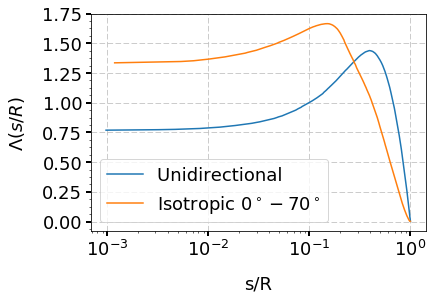

In [2]:
EnDissip_fct_Uni=pds.read_csv("./Energy_deposition_unidirectional.txt", delim_whitespace=True, 
                              header=None, index_col=0)
EnDissip_fct_Uni.columns=["fct_unidir"]

ind=np.where(EnDissip_fct_Uni.index >0)[0]
plt.plot(EnDissip_fct_Uni.index[ind],EnDissip_fct_Uni["fct_unidir"][EnDissip_fct_Uni.index[ind]],
        label="Unidirectional " )


EnDissip_fct_Iso=pds.read_csv("./Energy_deposition_isotropic_0_70.txt", delim_whitespace=True, 
                              header=None, index_col=0)
EnDissip_fct_Iso.columns=["fct_iso"]

ind=np.where(EnDissip_fct_Iso.index >0)[0]
plt.plot(EnDissip_fct_Iso.index[ind],EnDissip_fct_Iso["fct_iso"][EnDissip_fct_Iso.index[ind]], 
         label="Isotropic " r'$0 {^\circ}-70{^\circ}$')

plt.ylabel(r'$\Lambda(s/R)$')
plt.xlabel("s/R")
plt.semilogx()

plt.legend(fontsize=18)
plt_axis(18, grid=True)

# EARTH


-  From the Earth atmosphere model __[NRLMSISE-00 Atmosphere Model](https://ccmc.gsfc.nasa.gov/modelweb/models/nrlmsise00.php)__ we download the density profile for different species

<br>
In the following cells we read the different files and do the plottings


In [5]:
# Reading the NRLMSISE-00 file
df_NRL=read_NRLMSIS("nrlmsise_25485.lst", ["O","N2","O2","He", "H", "N"])

In [6]:
nc_fid = Dataset("SCIAMACHY_NO_MLT_orbits_2012_v6.2.nc", 'r')
NO_density=nc_fid.variables['NO_NOEM'][10][10]
altitude=nc_fid.variables['altitude'][:]
df_NO=pds.DataFrame(NO_density,altitude, columns=["NO"])

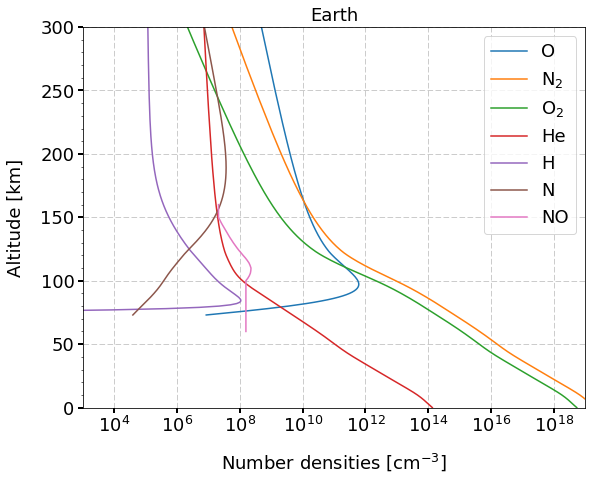

In [7]:
plt.plot(df_NRL["O"],df_NRL.index, label="O")
plt.plot(df_NRL["N2"],df_NRL.index, label='N'r'$_2$')
plt.plot(df_NRL["O2"],df_NRL.index,label='O'r'$_2$')
plt.plot(df_NRL["He"],df_NRL.index,label='He')
plt.plot(df_NRL["H"],df_NRL.index,label='H')
plt.plot(df_NRL["N"],df_NRL.index,label='N')
plt.plot(df_NO["NO"],df_NO.index,label='NO')
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.title("Earth")
plt.semilogx()
plt.xlim(1e3,1e19)
plt.ylim(0,300)

plt.legend(fontsize=18)
plt_axis(18, grid=True)

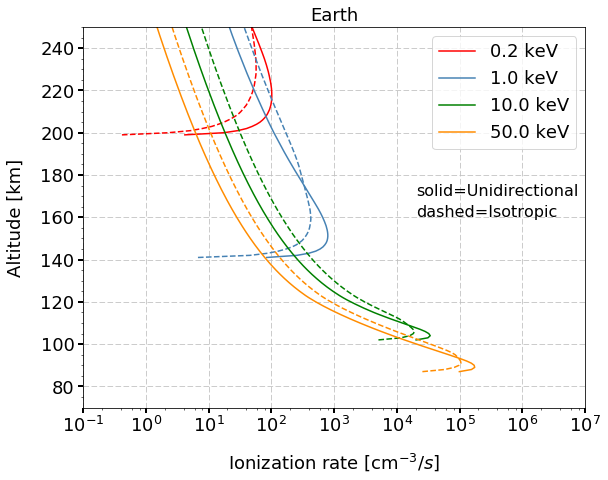

In [8]:
Tot_n=df_NRL["O"]*16+df_NRL["O2"]*32+df_NRL["N2"]*28+df_NRL["He"]*4

Ep=[200, 1000, 10000, 50000]
c=['red', 'steelblue','green','darkorange']

s=Scaterring_Depth(df_NRL.index, Tot_n)
delta_E=35 #eV
F=1e8 #cm-2s-1

i=0
for E in Ep:
    IonRate_Uni=Ionization_Rate(df_NRL,E,s, EnDissip_fct_Uni,Tot_n,delta_E,F)
    IonRate_iso=Ionization_Rate(df_NRL,E,s, EnDissip_fct_Iso,Tot_n,delta_E,F)
    plt.plot(IonRate_Uni[0],IonRate_Uni[1], label=str(E*1e-3) +" keV",color=c[i])
    plt.plot(IonRate_iso[0],IonRate_iso[1],linestyle='--',color=c[i], label='_nolegend_')
    plt.semilogx()
    plt.ylim(70,250)
    plt.xlim(1e-1,1e7)    
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ionization rate [cm' r'$^{-3}/s]$')
    plt.title("Earth")
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)    
    i+=1
plt.text(2e4,170,"solid=Unidirectional", fontsize=16)
plt.text(2e4,160,"dashed=Isotropic", fontsize=16)
    


## VENUS


The composition profiles of CO$_2$, CO and O of Venus atmopshere are taken from: __[Hedin et. al., JGR, 1983](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JA088iA01p00073)__ (table 3a)
<br>
For O$_2$, the profiles is taken from __[Krasnopolsky and Parshev, Nature, 1980](https://www.nature.com/articles/292610a0)__ (Figure 1).



In [3]:
df_Venus0=pds.read_csv("Venus_model.txt", header=0, sep="\t")

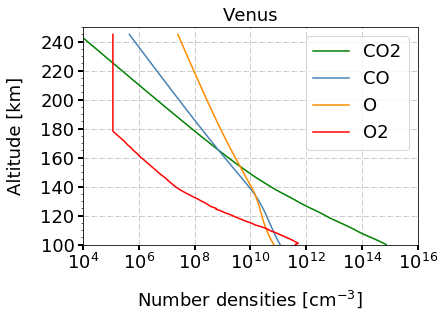

In [4]:
plt.plot(df_Venus0['CO2'],df_Venus0['alt'], label="CO2", color="green")
plt.plot(df_Venus0['CO'],df_Venus0['alt'], label="CO", color='steelblue')
plt.plot(df_Venus0['O'],df_Venus0['alt'], label="O", color='darkorange')
plt.plot(df_Venus0['O2'],df_Venus0['alt'], label="O2", color="red")
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.title("Venus")
plt.semilogx()
plt.ylim(100,250)
plt.xlim(1e4,1e16)
plt.legend(fontsize=18)
plt_axis(18, grid=True)

[]

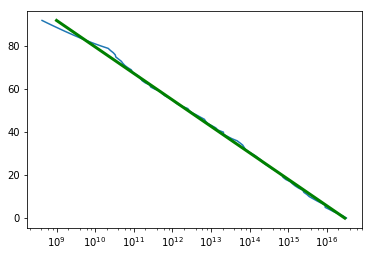

In [42]:



plt.plot(yfit,x,lw=3, c='g', zorder=10)


plt.semilogx()

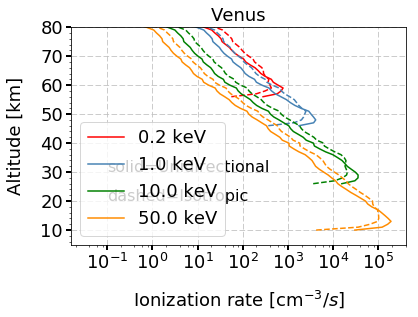

In [6]:
Tot_n_Venus=df_Venus0["O"]*16+df_Venus0["O2"]*32+df_Venus0["CO"]*28+df_Venus0["CO2"]*44

y=Tot_n_Venus
x=df_Venus0.index

A, K = fit_exp_linear(x,y)
Tot_n_Venus_fit=A*np.exp(x*K)

Ep=[200, 1000, 10000, 50000]
c=['red', 'steelblue','green','darkorange']

s=Scaterring_Depth(df_Venus0.index, Tot_n_Venus)
delta_E=35 #eV
F=1e8 #cm-2s-1

i=0
for E in Ep:
    IonRate_Uni=Ionization_Rate(df_Venus0,E,s, EnDissip_fct_Uni,Tot_n_Venus,delta_E,F)
    IonRate_iso=Ionization_Rate(df_Venus0,E,s, EnDissip_fct_Iso,Tot_n_Venus,delta_E,F)
    plt.plot(IonRate_Uni[0],IonRate_Uni[1], label=str(E*1e-3) +" keV",color=c[i])
    plt.plot(IonRate_iso[0],IonRate_iso[1],linestyle='--',label='_nolegend_',color=c[i])
    plt.semilogx()    
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ionization rate [cm' r'$^{-3}/s]$')
    plt.title("Venus")
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)
    plt.ylim(5,80)
    i+=1
plt.text(1e-1,30,"solid=Unidirectional", fontsize=16)
plt.text(1e-1,20,"dashed=Isotropic", fontsize=16)

## MARS

For Mars, the composition profiles are taken from For NO the values are taken from  __[R. W. Schunk and A. F. Nagy, 2009](https://www.researchgate.net/publication/253827157_Ionospheres)__ Chapter 2, section 2.4.3, Figure 2.22.<br>
Data can be extracted as well from __[Nier and McElroy, JGR, 1977](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JS082i028p04341)__  Figure 4

In [13]:
df_Mars=pds.read_csv("Mars_model.txt", sep="\t")


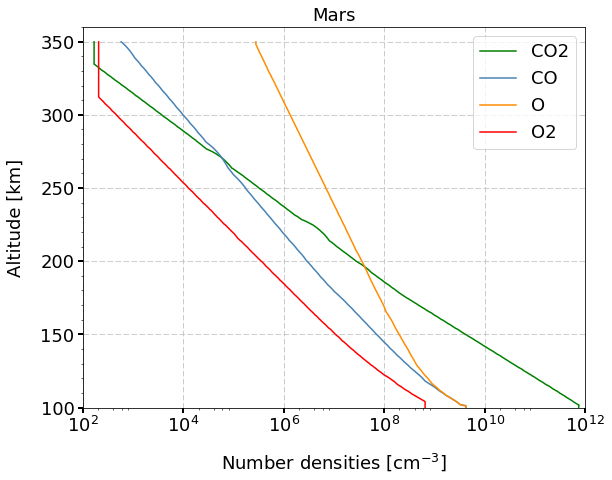

In [14]:
plt.plot(df_Mars['CO2'],df_Mars['alt'], label="CO2", color="green")
plt.plot(df_Mars['CO'],df_Mars['alt'], label="CO", color='steelblue')
plt.plot(df_Mars['O'],df_Mars['alt'], label="O", color='darkorange')
plt.plot(df_Mars['O2'],df_Mars['alt'], label="O2", color="red")
plt.ylabel('Altitude [km]')
plt.xlabel('Number densities [cm' r'$^{-3}]$')
plt.title("Mars")
plt.semilogx()
plt.ylim(100,360)
plt.xlim(1e2,1e12)
plt.legend(fontsize=18)
plt_axis(18, grid=True)

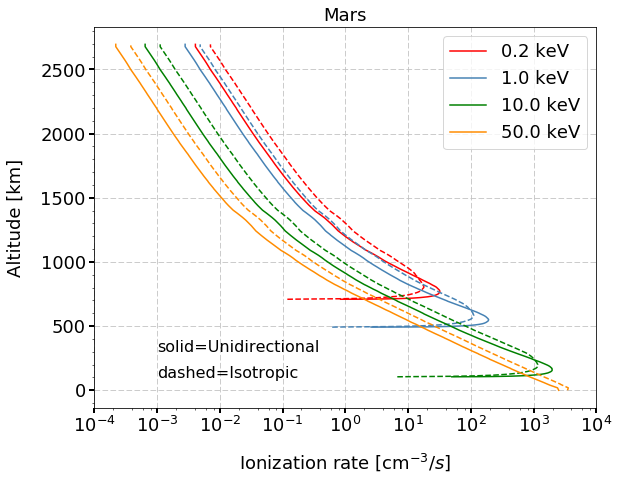

In [16]:
Tot_n_Mars=df_Mars["O"]*16+df_Mars["O2"]*32+df_Mars["CO"]*28+df_Mars["CO2"]*44

Ep=[200, 1000, 10000, 50000]
c=['red', 'steelblue','green','darkorange']

s=Scaterring_Depth(df_Mars.index, Tot_n_Mars)
delta_E=35 #eV
F=1e8 #cm-2s-1

i=0
for E in Ep:
    IonRate_Uni=Ionization_Rate(df_Mars,E,s, EnDissip_fct_Uni,Tot_n_Mars,delta_E,F)
    IonRate_iso=Ionization_Rate(df_Mars,E,s, EnDissip_fct_Iso,Tot_n_Mars,delta_E,F)
    plt.plot(IonRate_Uni[0],IonRate_Uni[1], label=str(E*1e-3) +" keV",color=c[i])
    plt.plot(IonRate_iso[0],IonRate_iso[1],linestyle='--', label="_nolegend_",color=c[i])
    plt.semilogx()    
    plt.xlim(1e-4,1e4) 
    plt.ylabel('Altitude [km]')
    plt.xlabel('Ionization rate [cm' r'$^{-3}/s]$')
    plt.title('Mars')
    plt.legend(fontsize=18)
    plt_axis(18, grid=True)    
    i+=1

plt.text(1e-3,300,"solid=Unidirectional", fontsize=16)
plt.text(1e-3,100,"dashed=Isotropic", fontsize=16)